# fastReach Data Exploration

## Loading Data

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score, KFold
import pickle

pID = '9'

path = '/Users/lukasgehrke/Documents/publications/2021-fastReach/data/study/eeglab2python/'
data_fname = '/data.csv'
data = pd.read_csv(path+pID+data_fname)

# selected EEG chans
chans_fname = '/chans.csv'
chans = np.array(pd.read_csv(path+pID+chans_fname))
filename = path+pID+'/chans_'+pID+'_eeg.sav'
pickle.dump(chans, open(filename, 'wb'))

## Build feature matrix EEG

In [102]:
# import feature computation functions

# EEG features
# 1. windowed means over EEG channels
win_mean_size = 25
win_mean = np.arange(len(data))//win_mean_size

win_mean = data.groupby(win_mean).mean()

df2 = win_mean.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_mean.columns[4:].tolist())
df2.reset_index(inplace=True)

df2



# from sklearn.linear_model import LinearRegression
# def model(df):
#     y = df[['Motion']].values
#     X = df[['Fz']].values
#     return np.squeeze(LinearRegression().fit(X, y).predict())

# win_mean = data.groupby(win_mean).apply(model)

# # EMG features
# def rms(values):
#     return np.sqrt(sum(values**2)/len(values))w

# emg = data.iloc[:,[0,3]]
# emg = emg.groupby(['epoch_ix'])["emg"].apply(rms)


epoch_ix rp_class       FT10                                   \
sample                       -0.948     -0.848     -0.748     -0.648   
0           1.0      1.0  -2.352686 -13.520627 -14.018748  54.311958   
1           2.0      1.0 -31.629397 -28.181730 -23.793853 -25.106090   
2           3.0      1.0  63.770547  66.331968  71.457840  63.006543   
3           4.0      1.0 -17.514414 -13.408709  -9.851847  -1.670493   
4           5.0      1.0 -20.336851  -7.126428  -4.572959  -6.197274   
..          ...      ...        ...        ...        ...        ...   
139       140.0      2.0 -25.477610 -27.545434 -13.321299  -4.955560   
140       141.0      2.0 -53.417418 -45.082937 -36.177468 -29.958385   
141       142.0      2.0 -54.410208 -51.642538 -47.607748 -43.930298   
142       143.0      2.0 -51.523878 -44.751706 -38.152912 -35.938566   
143       144.0      2.0 -37.687341 -51.509370 -41.648564 -47.860703   

                                                                       ...  \
sample -0.5479999999999999 -0.44799999999999995     -0.348     -0.248  ...   
0                62.495663            44.677286  46.133323  54.821250  ...   
1               -23.881433           -20.018119  -6.660794  50.948752  ...   
2                49.552317            39.069809  49.118963  57.121549  ...   
3                58.973769            58.321186  57.329990  54.156581  ...   
4                -4.709212            -4.071002  23.733995  78.842171  ...   
..                     ...                  ...        ...        ...  ...   
139             -12.260290           -15.549027  -7.365811  -9.987635  ...   
140             -28.200067           -31.316931 -32.180320 -25.738137  ...   
141             -49.491615           -53.872387 -53.738826 -63.865467  ...   
142             -35.563131           -31.519394 -11.876839 -23.141759  ...   
143             -41.091480           -27.457815 -32.412037 -35.438369  ...   

              CP4                                                       \
sample     -0.948     -0.848     -0.748     -0.648 -0.5479999999999999   
0      -18.457311 -19.431744 -18.240696   1.718460            4.996755   
1        0.176657   3.164603   0.226972   6.614060           10.397544   
2        7.406066   7.067872   7.133944   9.202801           11.813508   
3       10.942425   5.511897  14.370115  18.149230           37.661710   
4      -12.265204  -9.212268 -13.296194 -10.762340           -3.479717   
..            ...        ...        ...        ...                 ...   
139     -6.549697  -9.746222 -12.239388  -7.333537          -15.111669   
140    -20.055756 -21.165966 -18.009984 -21.158244          -20.611482   
141    -11.661205  -6.223132  -6.824883  -8.493922           -7.713386   
142    -16.192537 -10.521450  -9.090864 -17.311642          -20.331717   
143    -20.525516 -22.156882 -17.247243 -27.126925          -19.175885   

                                                                        \
sample -0.44799999999999995     -0.348     -0.248 -0.14800000000000002   
0                  1.988223   4.596785   7.653485             3.645483   
1                 11.248379  15.419859  29.071886            31.640740   
2                  7.566386  13.862385  22.256093            20.537363   
3                 38.007866  43.951038  39.716896            38.705805   
4                 -0.917101   6.573262  23.257053            30.481442   
..                      ...        ...        ...                  ...   
139              -21.234786 -12.275010 -13.838588           -12.431024   
140              -17.128598 -15.892277 -10.811558           -11.591681   
141               -9.018605 -14.844386 -21.558513            -7.475550   
142              -18.856769  -6.700893 -15.690927           -16.867382   
143              -14.435273 -13.467028 -12.761391            -6.403963   

                   
sample     -0.048  
0        2.933250  
1       27.083079  
2       18.211948  
3       34.776543  
4       3

# Train & Inspect Models

## EEG

In [101]:
clf = LDA(solver='lsqr', shrinkage='auto')

# win_mean = pd.melt(win_mean, id_vars=['rp_class'], value_vars=win_mean.columns[5:].tolist())
# clf.fit(win_mean.iloc[:,2:].values, win_mean.rp_class)

eeg_dim1 = 2

clf.fit(df2.iloc[:,eeg_dim1:].values, df2.rp_class)
# clf.fit(win_mean.iloc[:,5:].values, win_mean.rp_class)
print(clf.coef_.shape)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

cv_results = cross_val_score(clf, df2.iloc[:,eeg_dim1:].values, df2.rp_class, cv=kfolds)
cv_average = cv_results.mean()
print(cv_average)
st_deviation = cv_results.std()
print(st_deviation)

filename = path+pID+'/model_'+pID+'_eeg.sav'
pickle.dump(clf, open(filename, 'wb'))


AttributeError: 'DataFrame' object has no attribute 'rp_class'

## Motion

In [95]:
clf = LDA()

# df3 = win_mean.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_mean.columns[3])
# df3.reset_index(inplace=True)
# clf.fit(df3.iloc[:,2:].values, df3.rp_class)

# feat = win_mean.iloc[:,2].values
# clf.fit(feat.reshape(-1, 1), win_mean.rp_class)
# clf.fit(data.iloc[:,motion_dim].values.reshape(-1,1), data.rp_class)

mov_data = data.groupby(['epoch_ix']).mean()
clf.fit(mov_data.Motion.values.reshape(-1,1), mov_data.rp_class)

# splits data randomly in n=folds 
kfolds = KFold(n_splits=10, random_state=1, shuffle=True) 

# cv_results = cross_val_score(clf, feat.reshape(-1, 1), win_mean.rp_class, cv=kfolds)
cv_results = cross_val_score(clf, mov_data.Motion.values.reshape(-1,1), mov_data.rp_class, cv=kfolds)
cv_average = cv_results.mean()
print(cv_average)
st_deviation = cv_results.std()

filename = path+pID+'/model_'+pID+'_motion.sav'
pickle.dump(clf, open(filename, 'wb'))

0.9866666666666667


# Plots

## Features

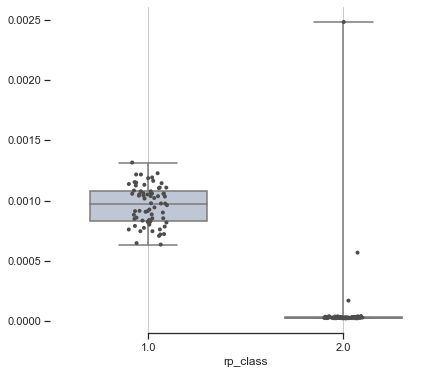

In [78]:
# g = sns.lmplot(x='Motion',y='Motion', data=data, hue='rp_class', fit_reg=False)
# g.set_axis_labels('{} muscle1'.format(feature), '{} muscle2'.format(feature))

data_short = data.groupby(['epoch_ix']).mean()

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
group_var = "rp_class"
val_var = "Motion"
sns.boxplot(x=group_var, y=val_var, data=data_short,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x=group_var, y=val_var, data=data_short,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)


## Linear Discriminant(s) Plot

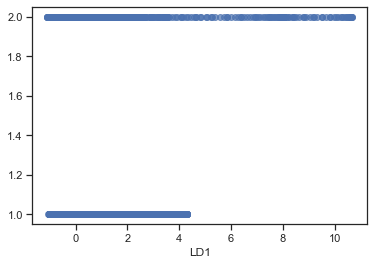

In [79]:
clf = LDA(n_components=1)
# data.loc[0,:]=np.zeros(data.shape[1])
# data_short = data.grouby(['epoch_ix']).mean()

transf_lda = clf.fit_transform(data.iloc[:,3].values.reshape(-1,1), data.rp_class)

# print(transf_lda)

plt.xlabel('LD1')
# plt.ylabel('LD2')
plt.scatter(
    x=transf_lda[:,0],
    y=data.rp_class,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

# import matplotlib.pyplot as plt
# for label,marker,color in zip(range(1,3),('o','^'),('red','blue')):
#     plt.scatter(x=transf_lda[:,0][data.rp_class == label],
#            y=[data.rp_class == label], marker=marker,
#            color=color, alpha=0.7, label='class {}'.format(label))

# #plt.xlabel('vector 1')
# #plt.ylabel('vector 2')

# plt.legend(loc='lower right')
# plt.title('dimensionality reduction for data set')

# plt.show()

## ERP Readiness Potential Plot

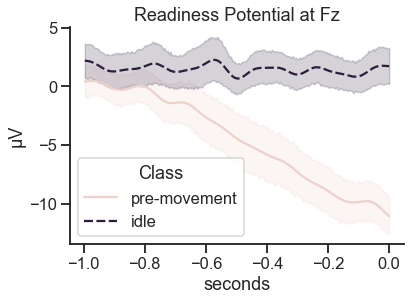

In [80]:
sns.set_theme(style="ticks")
sns.set_context("talk")

electrode = "Fz"

# Plot the responses for different events and regions
g = sns.lineplot(x="sample", y=electrode,
             hue="rp_class", style="rp_class",
             data=data)
sns.despine()
g.set(xlabel='seconds', ylabel='\u03bcV', title='Readiness Potential at '+electrode)

# legend
leg = g.legend_
new_title = 'Class'
leg.set_title(new_title)
# replace labels
new_labels = ['pre-movement', 'idle']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

## Trial Progression

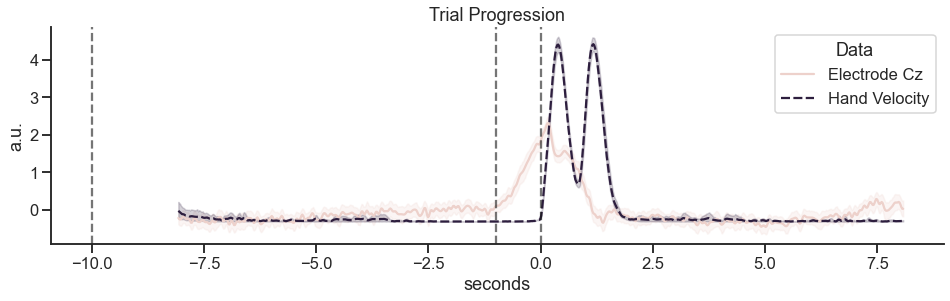

In [88]:
data_fname = '/data_for_plot.csv'
data = pd.read_csv(path+pID+data_fname)

sns.set(rc={'figure.figsize':(16,4)})

sns.set_theme(style="ticks")
sns.set_context("talk")

# Plot the responses for different events and regions
g = sns.lineplot(x="sample", y=data.columns[3], 
    hue="type", style="type", data=data)
sns.despine()

g.set(xlabel='seconds', ylabel='a.u.', title='Trial Progression')

xcoords = [-10, -1, 0]
for xc in xcoords:
    plt.axvline(x=xc, color='k', linestyle='--', alpha=.6)

electrode = "Cz"
# legend
leg = g.legend_
new_title = 'Data'
leg.set_title(new_title)
# replace labels
new_labels = ['Electrode '+electrode, 'Hand Velocity']
for t, l in zip(g.legend_.texts, new_labels):
    t.set_text(l)

plt.savefig("figure.pdf") # save as png

In [86]:
data.columns[3]

'MotionFT10'